In [1]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os


In [5]:
class_names = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 
               'Fighting', 'Normal', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Vandalism']
num_classes = len(class_names)


In [6]:
import torchvision.models as models
import torch.nn as nn

model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # num_classes = your number of output classes


In [12]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [13]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device() if torch.cuda.is_available() else "CPU")
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available: True
Current Device: 0
Device Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [ ]:
import torch

if torch.cuda.is_available():
    print("✅ CUDA is available")
    print("Device name:", torch.cuda.get_device_name(0))
    print("Memory Allocated:", round(torch.cuda.memory_allocated(0)/1024**2, 1), "MB")
    print("Memory Reserved:", round(torch.cuda.memory_reserved(0)/1024**2, 1), "MB")
else:
    print("❌ CUDA is NOT available")


✅ CUDA is available
Device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Memory Allocated: 0.0 MB
Memory Reserved: 28.0 MB


In [16]:
print(next(model.parameters()).device)  # Prints where the model is (should be 'cuda:0')


cuda:0


In [17]:
train_dir = r"C:\Users\dmsvi\OneDrive\Desktop\sdp dataset\Train"
test_dir = r"C:\Users\dmsvi\OneDrive\Desktop\sdp dataset\Test"


In [18]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [19]:
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)
print("Classes:", class_names)


Classes: ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


In [20]:
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, num_classes)
model = model.to(device)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [27]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)


In [28]:
from torch.utils.data import Subset
small_train = Subset(train_dataset, range(5000))
small_loader = DataLoader(small_train, batch_size=32, shuffle=True)


In [29]:
torch.backends.cudnn.benchmark = True


In [33]:
model = model.to(device)  # This ensures model is on GPU if available


In [34]:
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Move model to GPU if available
model = model.to(device)


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")
if device.type == 'cuda':
    print(f"🚀 GPU Name: {torch.cuda.get_device_name(0)}")
    torch.backends.cudnn.benchmark = True  # Speed up training for fixed-size inputs

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training parameters
num_epochs = 2  # You can increase later
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    print(f"\n🟢 Epoch {epoch+1}/{num_epochs}")
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        # Update progress bar
        loop.set_postfix(loss=loss.item(), acc=100.*correct/total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    train_losses.append(epoch_loss)

    print(f"✅ Epoch {epoch+1} complete | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%")


✅ Using device: cuda
🚀 GPU Name: NVIDIA GeForce RTX 3050 Ti Laptop GPU

🟢 Epoch 1/2


✅ Epoch 1 complete | Loss: 0.0334 | Accuracy: 99.08%

🟢 Epoch 2/2


✅ Epoch 2 complete | Loss: 0.0099 | Accuracy: 99.71%


In [36]:
def evaluate_model(model, loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total


In [38]:
# Save the entire model
torch.save(model.state_dict(), "mobilenet_v2_crime_detection.pth")
print("✅ Model saved successfully as mobilenet_v2_crime_detection.pth")


✅ Model saved successfully as mobilenet_v2_crime_detection.pth


In [54]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import torch
import torch.nn as nn
from torchvision import models

# Set number of classes (replace with your actual number)
num_classes = 14  # Example: 5 crime categories

# Load model architecture
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Load saved weights
model.load_state_dict(torch.load("mobilenet_v2_crime_detection.pth"))

# Send model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set to evaluation mode if only testing
# model.eval()


c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [12]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set the paths to your dataset
train_dir = r"C:\Users\dmsvi\OneDrive\Desktop\sdp dataset\Train"
test_dir = r"C:\Users\dmsvi\OneDrive\Desktop\sdp dataset\Test"

# Define transformations (resize based on MobileNetV2 input: 224x224)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)

print(f"✅ Data Loaders ready — {num_classes} classes: {class_names}")


✅ Data Loaders ready — 14 classes: ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']



🟢 Epoch 1/5


✅ Epoch 1 completed in 6098.72s | Train Acc: 99.78% | Val Acc: 48.15%

🟢 Epoch 2/5


✅ Epoch 2 completed in 6127.57s | Train Acc: 99.81% | Val Acc: 54.19%

🟢 Epoch 3/5


✅ Epoch 3 completed in 6006.48s | Train Acc: 99.84% | Val Acc: 60.76%

🟢 Epoch 4/5


✅ Epoch 4 completed in 6068.13s | Train Acc: 99.85% | Val Acc: 58.44%

🟢 Epoch 5/5


✅ Epoch 5 completed in 6005.58s | Train Acc: 99.86% | Val Acc: 56.61%


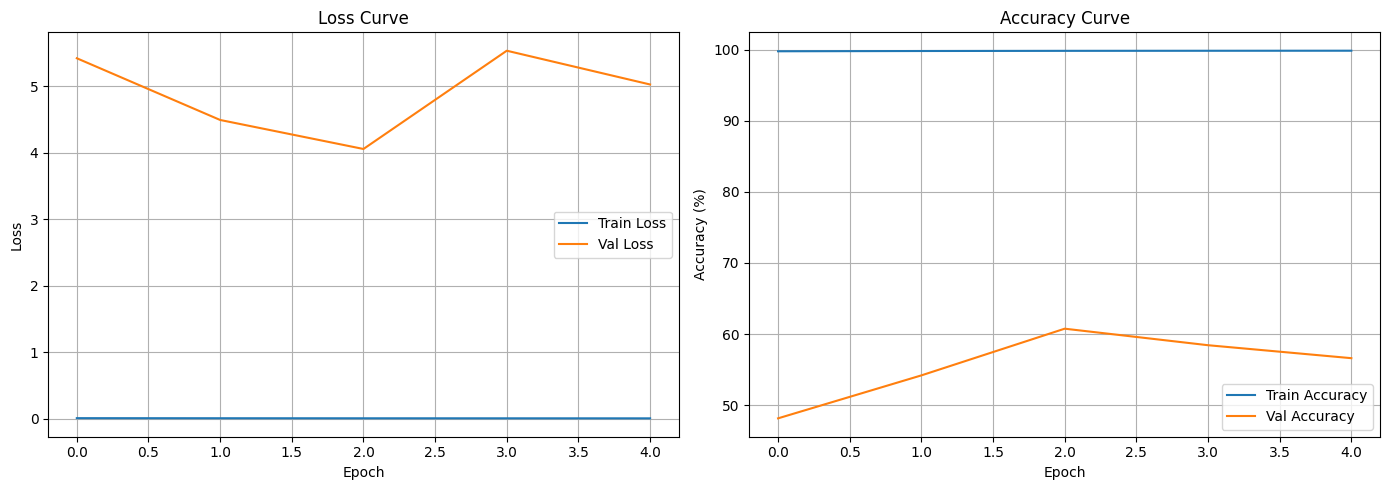

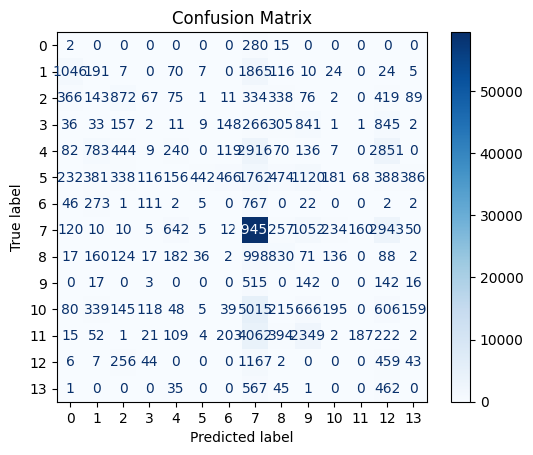

📄 Classification Report:
               precision    recall  f1-score   support

        Abuse       0.00      0.01      0.00       297
       Arrest       0.08      0.06      0.07      3365
        Arson       0.37      0.31      0.34      2793
      Assault       0.00      0.00      0.00      2657
     Burglary       0.15      0.03      0.05      7657
    Explosion       0.86      0.07      0.13      6510
     Fighting       0.00      0.00      0.00      1231
 NormalVideos       0.74      0.92      0.82     64952
RoadAccidents       0.27      0.31      0.29      2663
      Robbery       0.02      0.17      0.04       835
     Shooting       0.25      0.03      0.05      7630
  Shoplifting       0.45      0.02      0.05      7623
     Stealing       0.05      0.23      0.08      1984
    Vandalism       0.00      0.00      0.00      1111

     accuracy                           0.57    111308
    macro avg       0.23      0.15      0.14    111308
 weighted avg       0.56      0.57    

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import time
from tqdm import tqdm
import seaborn as sns

# Training parameters
num_epochs = 5
train_losses, val_losses = [], []
train_accs, val_accs = [], []

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
for epoch in range(num_epochs):
    print(f"\n🟢 Epoch {epoch+1}/{num_epochs}")
    start_time = time.time()

    # Training
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        loop.set_postfix(loss=loss.item(), acc=100.*correct/total)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        loop = tqdm(test_loader, desc="Validating", leave=False)
        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            loop.set_postfix(loss=loss.item())

    val_losses.append(val_loss / len(test_loader))
    val_accs.append(100. * val_correct / val_total)

    elapsed = time.time() - start_time
    print(f"✅ Epoch {epoch+1} completed in {elapsed:.2f}s | Train Acc: {epoch_acc:.2f}% | Val Acc: {val_accs[-1]:.2f}%")

# Plot Loss and Accuracy Curves
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Val Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# Classification Report
class_names = train_loader.dataset.classes
print("📄 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


In [35]:
torch.save(model, "mobilenet_v2_crime_detection_full2.pth")
print("✅ Entire model saved successfully as mobilenet_v2_crime_detection_full2.pth")


✅ Entire model saved successfully as mobilenet_v2_crime_detection_full2.pth


In [42]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Explicitly set weights_only=False
model = torch.load("mobilenet_v2_crime_detection_full2.pth", map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'), weights_only=False)
model.eval()


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [98]:
import torch
from torchvision import models, transforms
from PIL import Image

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model architecture
model = models.mobilenet_v2(pretrained=False)
num_classes = len(train_loader.dataset.classes)  # Make sure train_loader is defined or manually set
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, num_classes)

# Load saved weights
model.load_state_dict(torch.load("mobilenet_v2_crime_detection.pth", map_location=device))
model.to(device)
model.eval()

# Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Image path (your given image)
img_path = r"C:\Users\dmsvi\OneDrive\Desktop\sdp dataset\Train\RoadAccidents\RoadAccidents003_x264_60.png"
image = Image.open(img_path).convert('RGB')
image = transform(image).unsqueeze(0).to(device)

# Prediction
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)

# Class names
class_names = train_loader.dataset.classes  # or manually define: ['Arrest', 'Assault', ...]
print(f"🧠 Predicted Class: {class_names[predicted.item()]}")


🧠 Predicted Class: RoadAccidents


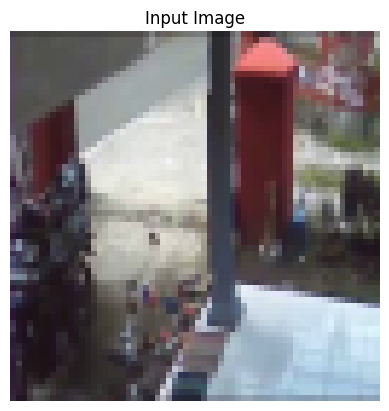

In [99]:
from PIL import Image
import matplotlib.pyplot as plt

# Show input image
img = Image.open(img_path)
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')
plt.show()
